## Aim:
Write a program in python to predict if a loan will get approved or not.

>The goal of this project is that from the data collected on the loan's applicants, preprocess the data
and predict based on the information who will be able to receive the loan or not.

In the Dataset we find 13 columns as follows:

1. Loan ID, the identifier code of each applicant.
2. Gender, Male or Female for each applicant.
3. Married, the maritage state.
4. Dependents, how many dependents does the applicant have?
5. Education, the level of education, graduate or non graduate
6. Self Employed, Yes or No in the case
7. Applicant Income
8. Coapplicant Income
9. Loan Amount
10. Loan Amount Term
11. Credit History, just Yes or No in the case
12. Property Area, urban, semiurban or rural area of the applicant’s property

The 13th column represents Loan Status- **Yes** or **No**.
This column is our target value (dependent variable).


#### Importing the libraries:

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the .csv file:

In [127]:
file = '/home/ayan/Documents/loan_prediction_data.csv'
df = pd.read_csv(file)

In [128]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Analyzing the data:

In [129]:
df.shape

(614, 13)

In [130]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [132]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

### Encoding categorical attributes:
Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models. 
> **Categorical Data:**  
Categorical data is data that is divided into groups or categories. These categories are based on qualitative characteristics such as gender and colors or something else that doesn’t have a number associated with it.

In [134]:
#Loan Status Encoding
df = df.replace({"Loan_Status":{'Y': 1, 'N': 0}})

#Gender Encoding
df = df.replace({"Gender":{"Male":1, "Female":0}})

#Married Encoding
df = df.replace({"Married" :{"Yes":1, "No":90}})

#Replace the 3+ in dependents and make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = pd.to_numeric(df['Dependents'], errors = 'coerce')

#Count the quantity of values on the column
df['Self_Employed'].value_counts()
df = df.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
df['Education'].value_counts()
df = df.replace({"Education":{"Graduate":1, "Not Graduate":2}})

#Drop the Loan ID coLumn
df = df.drop('Loan_ID',axis=1)

#Property Area Encoding
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'SemiUrban':2})

df                                            

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,90.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1
3,1.0,1.0,0.0,2,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,1.0,90.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,90.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0.0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1.0,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1.0,1


In [135]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,381.000000,614.000000
mean,0.813644,32.026187,0.762938,1.218241,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.530184,0.687296
std,0.389718,42.445907,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.499744,0.463973
min,0.000000,1.000000,0.000000,1.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,90.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000
max,1.000000,90.000000,3.000000,2.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000


#### Filling Null Values:

In [136]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

#### Data Visualization:
We will use heatmap for this.
>A **heat map** (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. There are two fundamentally different categories of heat maps: the **cluster heat map** and the **spatial heat map**.

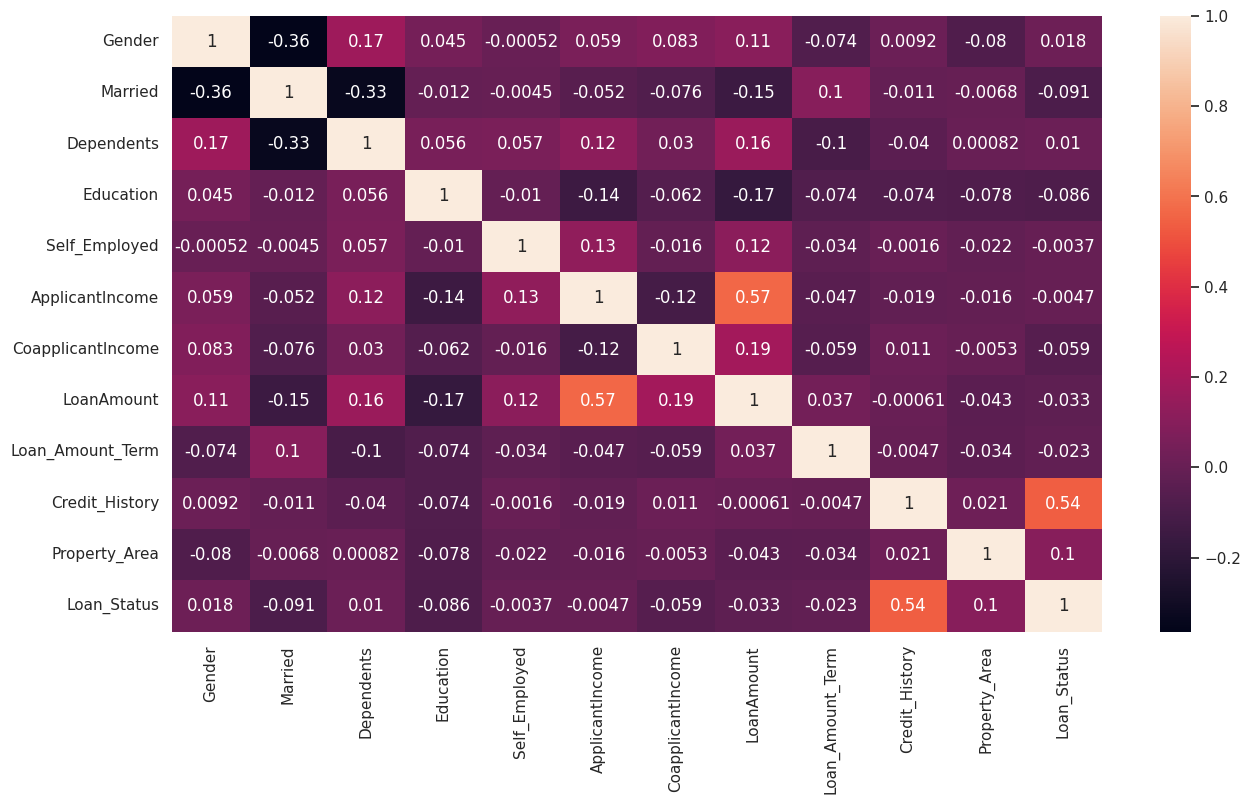

In [137]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.show()

In [138]:
def correlation_drop(df, s1):
    columns = df.columns
    for column in columns:
        C = abs(df[column].corr(df['Loan_Status']))
        if C<s1:
            df = df.drop(columns = [column])
    return df

df = correlation_drop(df, 0.05)
df

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,90.0,1,0.0,1.0,1.0,1
1,1.0,1,1508.0,1.0,0.0,0
2,1.0,1,0.0,1.0,1.0,1
3,1.0,2,2358.0,1.0,1.0,1
4,90.0,1,0.0,1.0,1.0,1
...,...,...,...,...,...,...
609,90.0,1,0.0,1.0,0.0,1
610,1.0,1,0.0,1.0,0.0,1
611,1.0,1,240.0,1.0,1.0,1
612,1.0,1,0.0,1.0,1.0,1


#### Separate the variables
We will now separate the dependent variable from independent variables.

In [139]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Scale the data

In [140]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(x)

#### Split the data
We will split the data 80-20: 80% for training the model and remaining 20% for testing it.

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training the Model:
We will be using Logistic Regression for this.

In [142]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
z = model.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,z)

0.8292682926829268

#### SVM Classifier
>**Support Vector Machine(SVM)** is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane.

In [144]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=0.2)
classifier.fit(X_train, y_train)

SVC(gamma=0.2)

Predicting the test results:

In [145]:
y_pred = classifier.predict(X_test)

#### Making the Confusion Matrix
>A **Confusion matrix** is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n')

#Applying k-fold cross validation:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train)
print(f'Accuracy: {round(accuracies.mean()*100,2)}%')
print(f'Standard Deviation: {round(accuracies.std()*100,2)}')

Confusion Matrix:
[[14 19]
 [ 2 88]] 

Accuracy: 80.44%
Standard Deviation: 3.52


#### Conclusion:
Loan Prediction dataset has been loaded, analyzed, visualized and used to train logistic regression model for which we got an accuracy of more than `80.44%` and Standard Deviation of `3.52`. Confusion Matrix for the classification results was also created.